# Regressão linear

Esse é o primeiro notebook do tutorial sobre deep learning 

Importa alguns modulos

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

Nesse exemplo, usaremos um *dataset* sobre diabetes:

In [2]:
diabetes = datasets.load_diabetes()

Aqui, vamos usar apenas a coluna 2 que é o indice de massa corporea

In [3]:
X=diabetes.data[:,2].reshape((-1,1))

$y$ eh uma medida de progresso da diabetes depois de um ano

In [4]:
y=diabetes.target

Visualizar o progresso da diabetes ($y$) como funcao da massa corporea ($y=f(X)$):

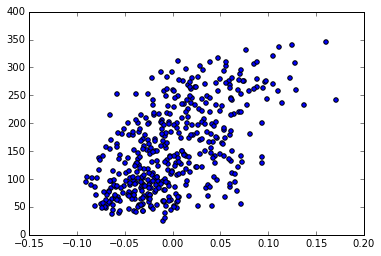

In [5]:
plt.scatter(X,y)

Parece haver uma tendencia nesse grafico. A medida que o indice de massa corporea aumenta, o progresso da diabetes aumenta.

Nao exite uma unica reta que passe por todos os pontos. Mas gostariamos de achar uma reta que fosse o mais "proximo" possivel do conjunto de pontos.

A equacao da reta eh:

$y=f(X)=A \cdot X+B$

Com essa equacao poderemos prever a evolucao da diabetes como funcao da massa corporea. Mas para isso temos de achar os valores de $A$ e $B$.

Regressao linear nos ajudara como isso. Mas antes disso vamos reescrever a equacao da reta de uma forma mais conveniente:

$$
y=f(X)=
\begin{bmatrix}
X & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
A\\
B
\end{bmatrix}
$$

Tenha certeza que voce entende isso!

Vamos abusar um pouco da notacao e chamar de $X$ a partir de agora isso: $\begin{bmatrix}
X & 1
\end{bmatrix}$. E $A$ isso: $\begin{bmatrix}
A\\
B
\end{bmatrix}$

Em python a mudanca de $X$ para $\begin{bmatrix}
X & 1
\end{bmatrix}$ é:

In [6]:
X=np.hstack((X, np.ones_like(X)))

lembre-se que o que queremos achar é (com a nova notacao):

$y=f(X)=X\cdot A$

A melhor aproximacao é dada pela *equação normal*:

$X^T\cdot X \cdot A = X^T \cdot y$

e para achar $A$:

$A = (X^T\cdot X)^{-1}\cdot X^T \cdot y$

NAO ENTRE EM CHOQUE!!! Se vc nao viu isso (ou viu e fez questao de esquecer) nao se preocupe. Mas recomendo voce ver isso em seu curso de Algebra Linear!

Em python a ultima equacao pode ser escrita como:

In [7]:
A=np.dot( np.dot(np.linalg.inv(np.dot(X.T,X)),X.T), y )

In [8]:
print A

[ 949.43526038  152.13348416]


Vamos prever com esses indices:

In [9]:
X1=np.arange(-0.15,0.20, 0.01).reshape(-1, 1)
X_predict = np.hstack((X1, np.ones_like(X1)))
y_predict = np.dot(X_predict, A)

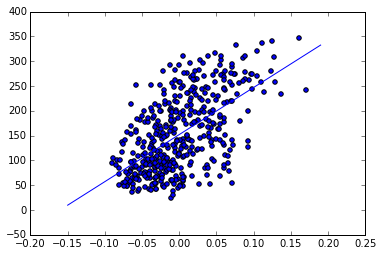

In [11]:
plt.scatter(X.T[0],y)
plt.plot(X1, y_predict)